**Import libraries**

In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from random import randint

***extract labels of files ***

In [2]:
file_to_name = dict()
name_to_file = dict()
count = 0
for j in os.listdir('/content/drive/MyDrive/leapGestRecog/00'):
    if not j.startswith('.'):
        file_to_name[j] = count
        name_to_file[count] = j
        count = count + 1
file_to_name

{'05_thumb': 0,
 '10_down': 1,
 '09_c': 2,
 '01_palm': 3,
 '06_index': 4,
 '03_fist': 5,
 '07_ok': 6,
 '02_l': 7,
 '08_palm_moved': 8,
 '04_fist_moved': 9}

**Data prepration**

In [3]:
x = []
y = []
datacount = 0

for i in range(0, 2):
    for j in os.listdir('/content/drive/MyDrive/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'):
            count = 0
            for k in os.listdir('/content/drive/MyDrive/leapGestRecog/0' + str(i) + '/' + j + '/'):
                img = Image.open('/content/drive/MyDrive/leapGestRecog/0' + str(i) + '/' + j + '/' + k).convert('L')
                img = img.resize((320, 120))
                arr = np.array(img)
                x.append(arr)
                count = count + 1
            y_values = np.full((count, 1), file_to_name[j])
            y.append(y_values)
            datacount = datacount + count

x = np.array(x, dtype='float32')
y = np.array(y)
y= y.reshape(datacount, 1)

**plot sample images with its label**

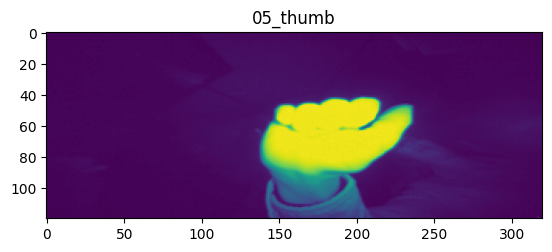

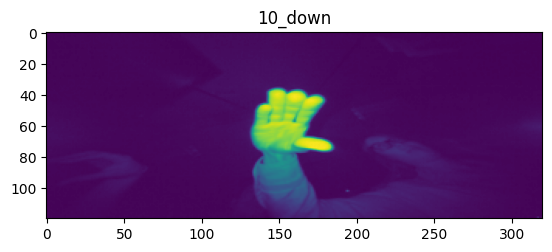

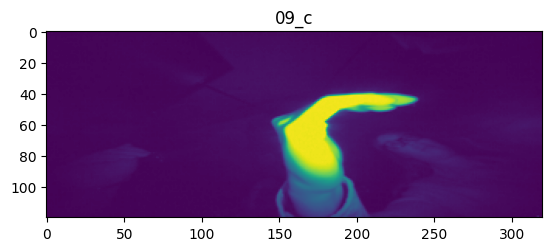

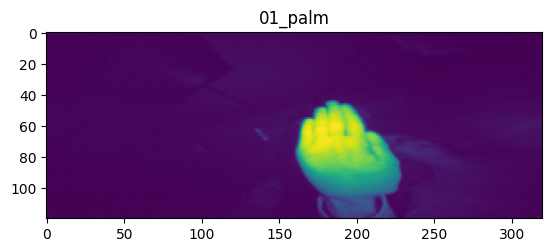

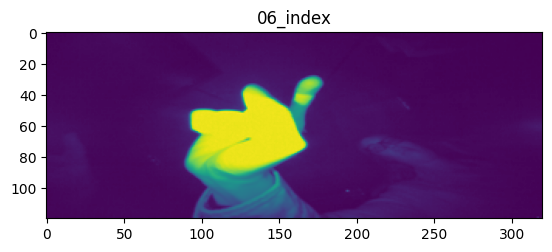

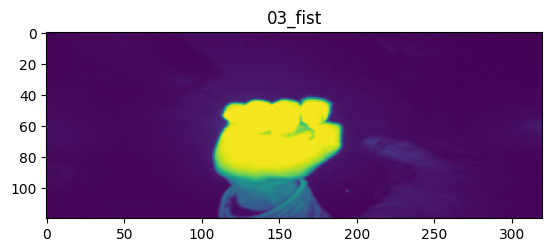

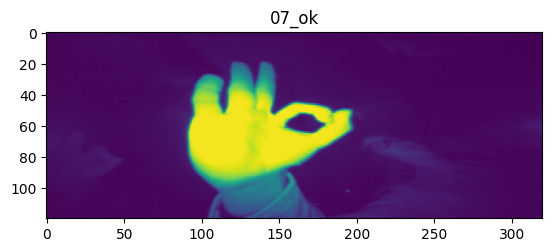

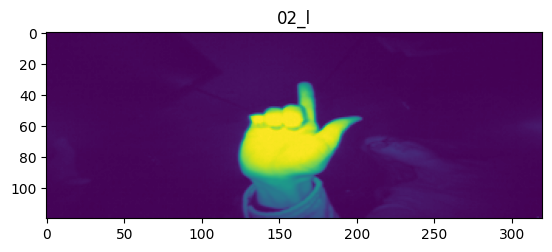

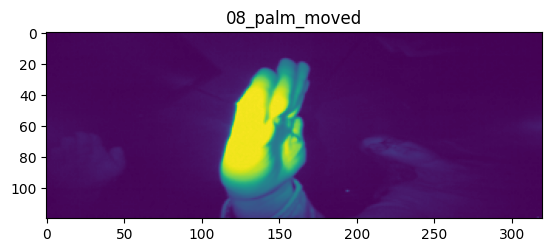

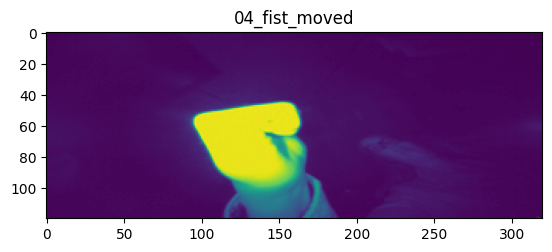

In [4]:
for i in range(0, 10):
    plt.imshow(x[i*200, :, :])
    # Set title to corresponding label
    plt.title(name_to_file[y[i*200, 0]])
    plt.show()

**prepare data for training**

In [5]:
y = to_categorical(y)
x = x.reshape((datacount, 120, 320, 1))
x /= 255

**split data to train and test**

In [6]:
x_train, x_sub, y_train, y_sub = train_test_split(x, y, test_size=0.2)
x_validate, x_test, y_validate, y_test = train_test_split(x_sub, y_sub, test_size=0.5)


**Build CNN for training model**

In [7]:
model = models.Sequential([layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320, 1)),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Flatten(),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(10, activation='softmax')])

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
50/50 [==============================] - 6s 30ms/step - loss: 0.6107 - accuracy: 0.8034 - val_loss: 0.0187 - val_accuracy: 0.9950
Epoch 2/10
50/50 [==============================] - 1s 23ms/step - loss: 0.0195 - accuracy: 0.9953 - val_loss: 5.8781e-04 - val_accuracy: 1.0000
Epoch 3/10
50/50 [==============================] - 1s 24ms/step - loss: 0.0354 - accuracy: 0.9931 - val_loss: 0.0048 - val_accuracy: 0.9975
Epoch 4/10
50/50 [==============================] - 1s 22ms/step - loss: 8.2320e-04 - accuracy: 1.0000 - val_loss: 3.9327e-04 - val_accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 1s 18ms/step - loss: 1.0149e-04 - accuracy: 1.0000 - val_loss: 3.7496e-04 - val_accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 1s 19ms/step - loss: 1.1308e-05 - accuracy: 1.0000 - val_loss: 1.8855e-04 - val_accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 1s 18ms/step - loss: 6.1515e-06 - accuracy: 1.0000 - val_loss: 1.4819e-04 

**Calculate accuracy of model**

In [9]:
[loss, acc] = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: " + str(acc))

13/13 [==============================] - 0s 6ms/step - loss: 1.0684e-04 - accuracy: 1.0000
Accuracy: 1.0
